### The dataset: https://www.kaggle.com/datasets/prathamtripathi/drug-classification/data


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [111]:
df = pd.read_csv('drug200.csv')

In [112]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## 1. Data preparation

In [113]:
df.columns = df.columns.str.lower() #.str.replace(' ', '_')
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [114]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drugy
1,47,m,low,high,13.093,drugc
2,47,m,low,high,10.114,drugc
3,28,f,normal,high,7.798,drugx
4,61,f,low,high,18.043,drugy


In [115]:
df['drug'] = df['drug'].apply(lambda x: x[:-1] + '_' + x[-1])
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drug_y
1,47,m,low,high,13.093,drug_c
2,47,m,low,high,10.114,drug_c
3,28,f,normal,high,7.798,drug_x
4,61,f,low,high,18.043,drug_y


## 2. EDA

In [116]:
df.describe()

,age,na_to_k
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [117]:
df.isna().sum()

age            0
sex            0
bp             0
cholesterol    0
na_to_k        0
drug           0
dtype: int64

In [118]:
df.dtypes

age              int64
sex             object
bp              object
cholesterol     object
na_to_k        float64
drug            object
dtype: object

In [119]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['sex', 'bp', 'cholesterol', 'drug']

In [120]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
numerical_columns


['age', 'na_to_k']

In [121]:
for i in df[categorical_columns]:
    value_counts = df[i].value_counts()
    print('-------------------------')
    print(value_counts)
    print('-------------------------')

-------------------------
sex
m    104
f     96
Name: count, dtype: int64
-------------------------
-------------------------
bp
high      77
low       64
normal    59
Name: count, dtype: int64
-------------------------
-------------------------
cholesterol
high      103
normal     97
Name: count, dtype: int64
-------------------------
-------------------------
drug
drug_y    91
drug_x    54
drug_a    23
drug_c    16
drug_b    16
Name: count, dtype: int64
-------------------------


##### **FINDING:** *During the EDA, I did not find any outliers; every feature's variant is present to a similar extent, with the exception of the target variable, where it is noticeable that there are variants that are present in much lower numbers than others.*

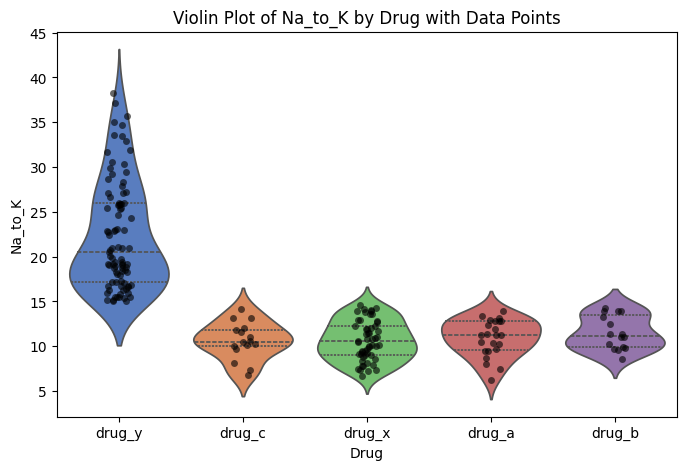

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.violinplot(x='drug', y='na_to_k', data=df, inner='quartile', palette='muted', hue='drug')

sns.stripplot(x='drug', y='na_to_k', data=df, color='k', alpha=0.6, jitter=True)

plt.xlabel('Drug')
plt.ylabel('Na_to_K')
plt.title('Violin Plot of Na_to_K by Drug with Data Points')
plt.show()

#### **FINDING:** *The data clearly shows that if the na_to_k ratio > ~15 then the drug_y usage is necessary.*

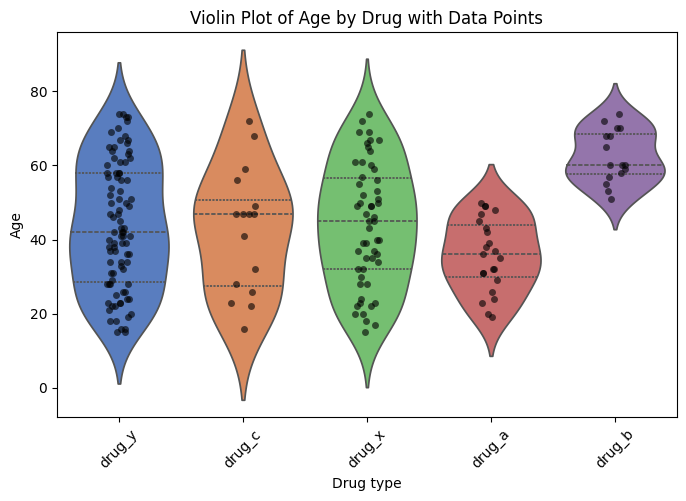

In [123]:
# Create a violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='drug', y='age', data=df, inner='quartile', palette='muted', hue='drug')

# Overlay individual data points with a stripplot
sns.stripplot(x='drug', y='age', data=df, color='k', alpha=0.6, jitter=True)

# Add labels and title
plt.xlabel('Drug type')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Drug with Data Points')

# Rotate x-axis labels
plt.xticks(rotation=46)

# Show plot
plt.show()


#### **FINDING:** Another striking thing is that drug_a was only given to patients under ~50 years old, while drug_b was only given to patients over ~50 years old.

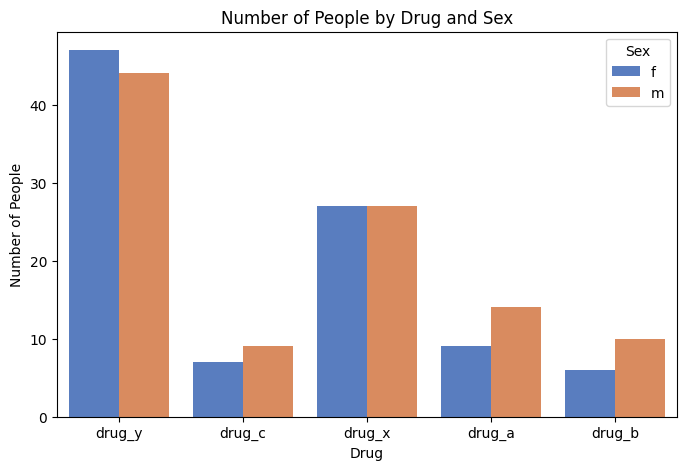

In [124]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a paired bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='drug', hue='sex', data=df, palette='muted')

# Add labels and title
plt.xlabel('Drug')
plt.ylabel('Number of People')
plt.title('Number of People by Drug and Sex')

# Show legend
plt.legend(title='Sex')

# Show plot
plt.show()


#### **FINDING:** *For each medication, if we examine the gender ratio, it is clear that there is no significant difference in which gender received the medication. This was already observed based on the mutual information score as well.*

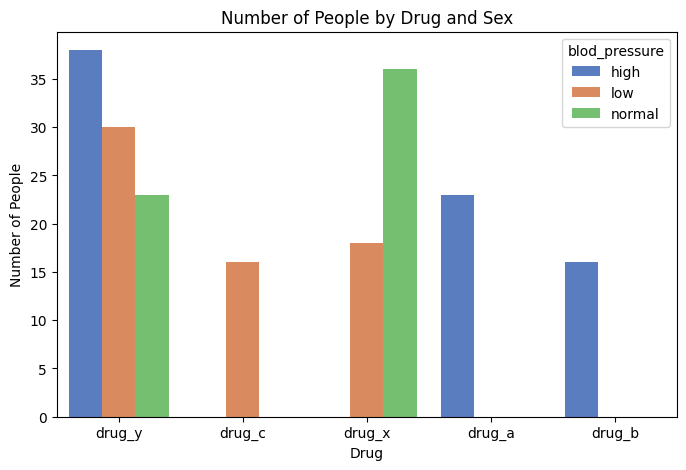

In [125]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='drug', hue='bp', data=df, palette='muted')

plt.xlabel('Drug')
plt.ylabel('Number of People')
plt.title('Number of People by Drug and Sex')

plt.legend(title='blod_pressure')

plt.show()


#### **FINDING:** *Drug_C is administered in cases of low blood pressure, while Drug_A and Drug_B are given in cases of high blood pressure. (and from a previous statement, we know that drug_a is for those under 50 years old and drug_b is for those over 50 years old.)*

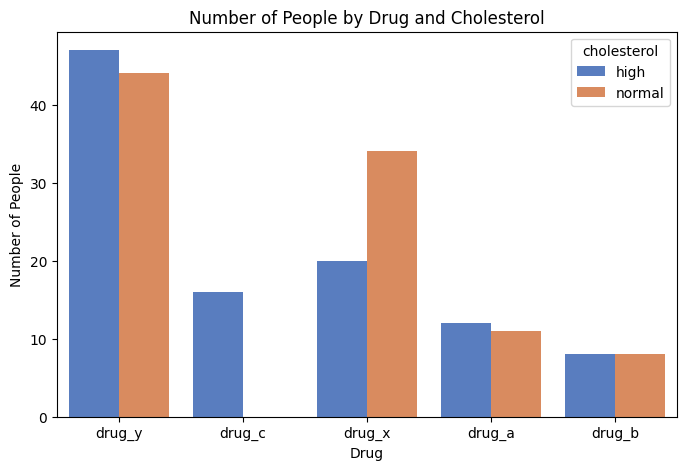

In [126]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a paired bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='drug', hue='cholesterol', data=df, palette='muted')

# Add labels and title
plt.xlabel('Drug')
plt.ylabel('Number of People')
plt.title('Number of People by Drug and Cholesterol')

# Show legend
plt.legend(title='cholesterol')

# Show plot
plt.show()


#### **FINDING:** *Drug_c is given only when cholesterol levels are high.*

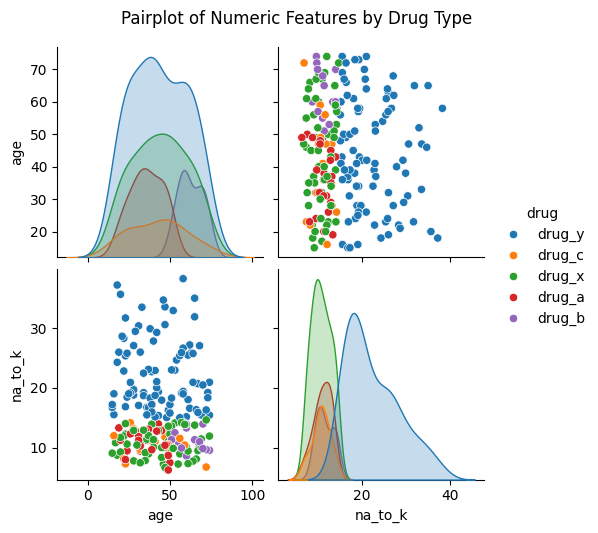

In [127]:
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
pairplot = sns.pairplot(df, vars=numeric_columns, hue="drug", diag_kind="kde")

pairplot.figure.suptitle("Pairplot of Numeric Features by Drug Type", y=1.05) 
plt.show()

#### **FINDING:** *This pairplot also clearly shows the separation of durg_a and drug_b by age group, as well as that everyone receives drug_y above a certain na_to_k ratio.*

#### **CONTEXT:** *For every categorical variable and their combinations, I created the combined columns with the target variable and represented the distribution of the data using a boxplot*

In [128]:
categorical_feature_cols = categorical_columns.remove('drug')

In [129]:
df

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drug_y
1,47,m,low,high,13.093,drug_c
2,47,m,low,high,10.114,drug_c
3,28,f,normal,high,7.798,drug_x
4,61,f,low,high,18.043,drug_y
...,...,...,...,...,...,...
195,56,f,low,high,11.567,drug_c
196,16,m,low,high,12.006,drug_c
197,52,m,normal,high,9.894,drug_x
198,23,m,normal,normal,14.020,drug_x


In [130]:
df_tmp = df.copy()


In [131]:
df_tmp

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drug_y
1,47,m,low,high,13.093,drug_c
2,47,m,low,high,10.114,drug_c
3,28,f,normal,high,7.798,drug_x
4,61,f,low,high,18.043,drug_y
...,...,...,...,...,...,...
195,56,f,low,high,11.567,drug_c
196,16,m,low,high,12.006,drug_c
197,52,m,normal,high,9.894,drug_x
198,23,m,normal,normal,14.020,drug_x


In [132]:
for col in categorical_columns:
    df_tmp[col] = df_tmp[col].apply(lambda x: x + '-' + col)

In [133]:
df_tmp

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f-sex,high-bp,high-cholesterol,25.355,drug_y
1,47,m-sex,low-bp,high-cholesterol,13.093,drug_c
2,47,m-sex,low-bp,high-cholesterol,10.114,drug_c
3,28,f-sex,normal-bp,high-cholesterol,7.798,drug_x
4,61,f-sex,low-bp,high-cholesterol,18.043,drug_y
...,...,...,...,...,...,...
195,56,f-sex,low-bp,high-cholesterol,11.567,drug_c
196,16,m-sex,low-bp,high-cholesterol,12.006,drug_c
197,52,m-sex,normal-bp,high-cholesterol,9.894,drug_x
198,23,m-sex,normal-bp,normal-cholesterol,14.020,drug_x


In [134]:
df_tmp['bp_c'] = df_tmp.apply(lambda row : row['bp'] + ' - ' + row['cholesterol'], axis= 1)
df_tmp['bp_c_d'] = df_tmp.apply(lambda row: row['bp_c'] + ' - ' + row['drug'], axis=1)
df_tmp['bp_drug'] = df_tmp.apply(lambda row : row['bp'] + ' - ' + row['drug'], axis= 1)
df_tmp['cholesterol_drug'] = df_tmp.apply(lambda row : row['cholesterol'] + ' - ' + row['drug'], axis= 1)

df_tmp

,age,sex,bp,cholesterol,na_to_k,drug,bp_c,bp_c_d,bp_drug,cholesterol_drug
0,23,f-sex,high-bp,high-cholesterol,25.355,drug_y,high-bp - high-cholesterol,high-bp - high-cholesterol - drug_y,high-bp - drug_y,high-cholesterol - drug_y
1,47,m-sex,low-bp,high-cholesterol,13.093,drug_c,low-bp - high-cholesterol,low-bp - high-cholesterol - drug_c,low-bp - drug_c,high-cholesterol - drug_c
2,47,m-sex,low-bp,high-cholesterol,10.114,drug_c,low-bp - high-cholesterol,low-bp - high-cholesterol - drug_c,low-bp - drug_c,high-cholesterol - drug_c
3,28,f-sex,normal-bp,high-cholesterol,7.798,drug_x,normal-bp - high-cholesterol,normal-bp - high-cholesterol - drug_x,normal-bp - drug_x,high-cholesterol - drug_x
4,61,f-sex,low-bp,high-cholesterol,18.043,drug_y,low-bp - high-cholesterol,low-bp - high-cholesterol - drug_y,low-bp - drug_y,high-cholesterol - drug_y
...,...,...,...,...,...,...,...,...,...,...
195,56,f-sex,low-bp,high-cholesterol,11.567,drug_c,low-bp - high-cholesterol,low-bp - high-cholesterol - drug_c,low-bp - drug_c,high-cholesterol - drug_c
196,16,m-sex,low-bp,high-cholesterol,12.006,drug_c,low-bp - high-cholesterol,low-bp - high-cholesterol - drug_c,low-bp - drug_c,high-cholesterol - drug_c
197,52,m-sex,normal-bp,high-cholesterol,9.894,drug_x,normal-bp - high-cholesterol,normal-bp - high-cholesterol - drug_x,normal-bp - drug_x,high-cholesterol - drug_x
198,23,m-sex,normal-bp,normal-cholesterol,14.020,drug_x,normal-bp - normal-cholesterol,normal-bp - normal-cholesterol - drug_x,normal-bp - drug_x,normal-cholesterol - drug_x


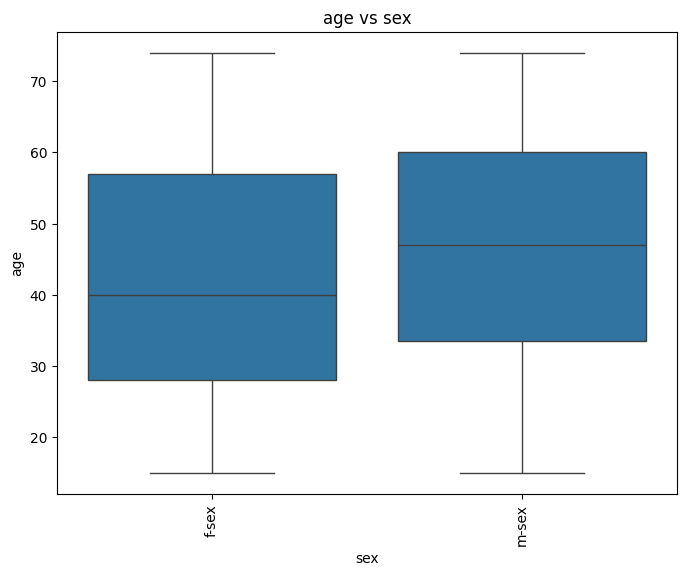

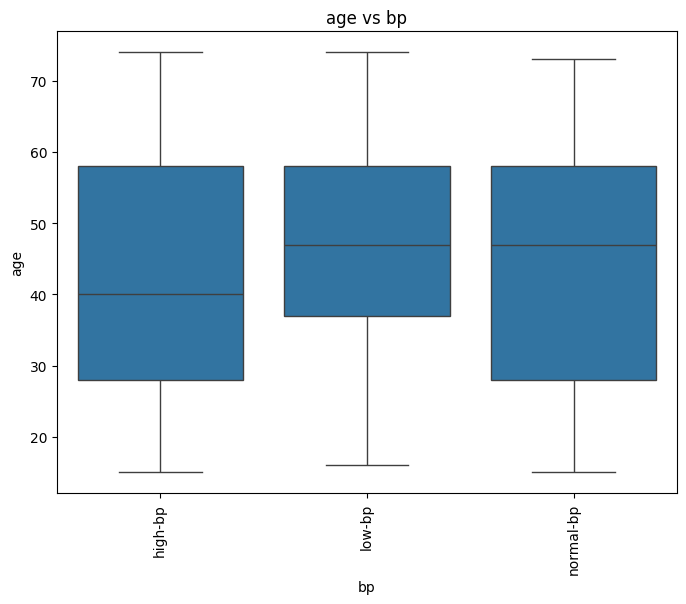

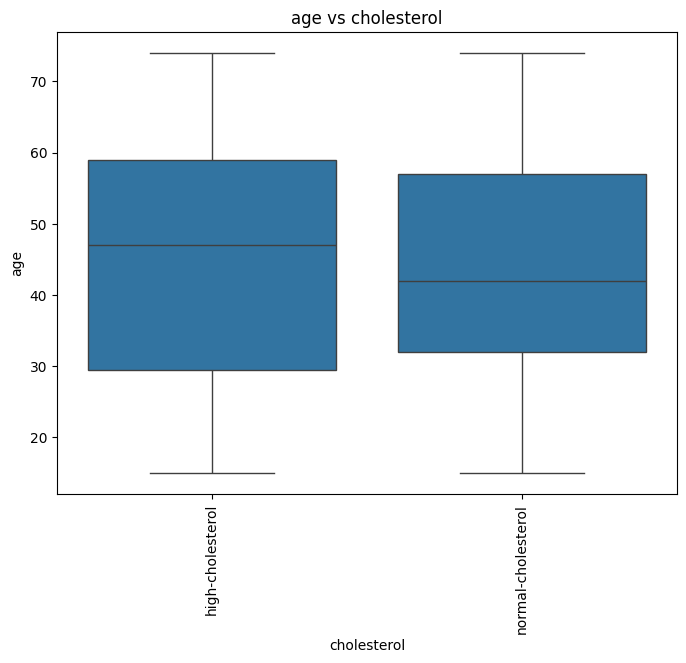

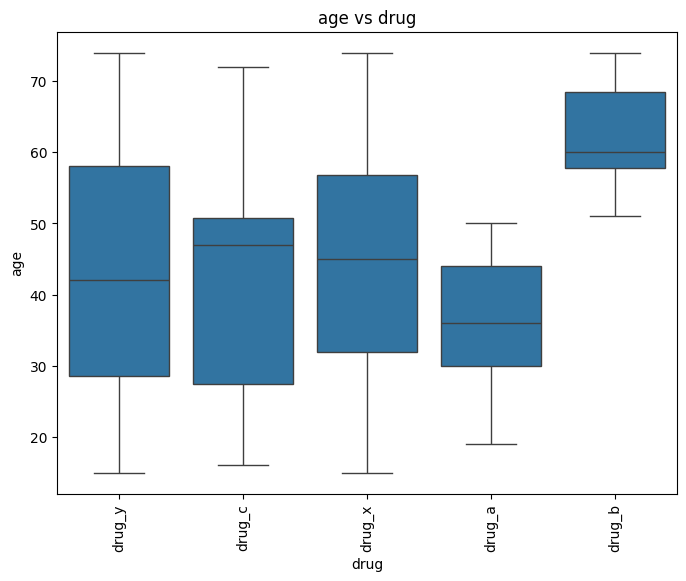

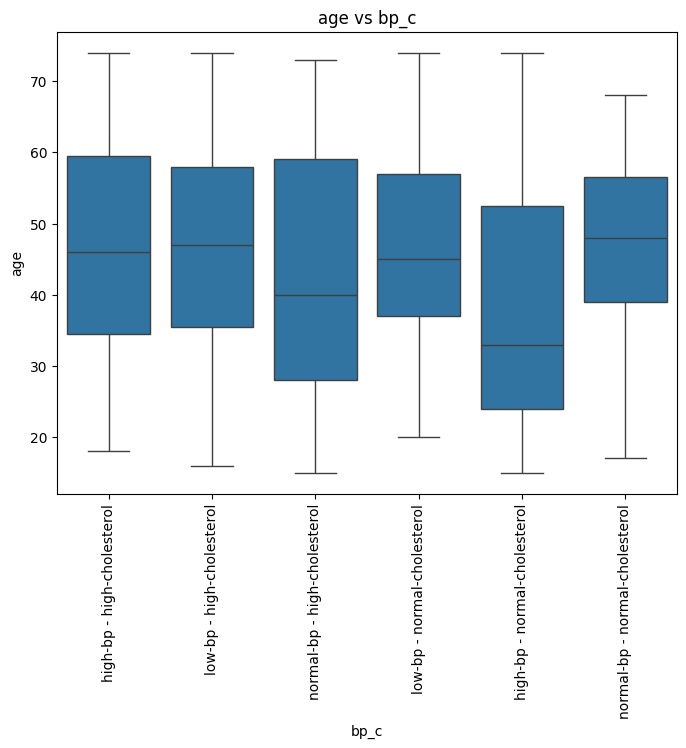

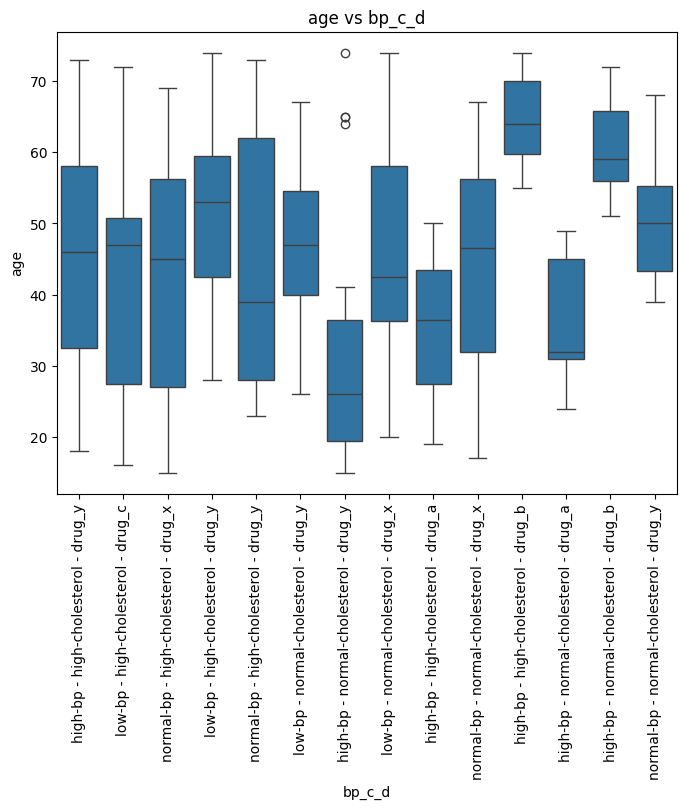

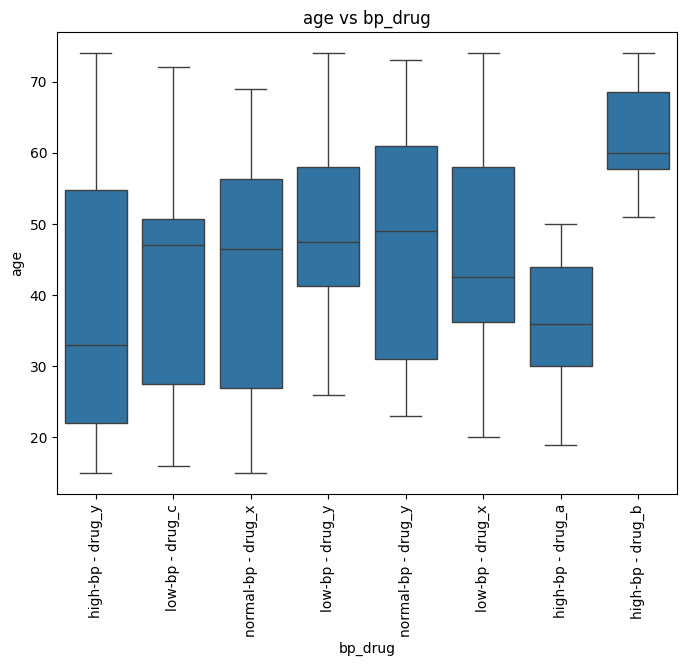

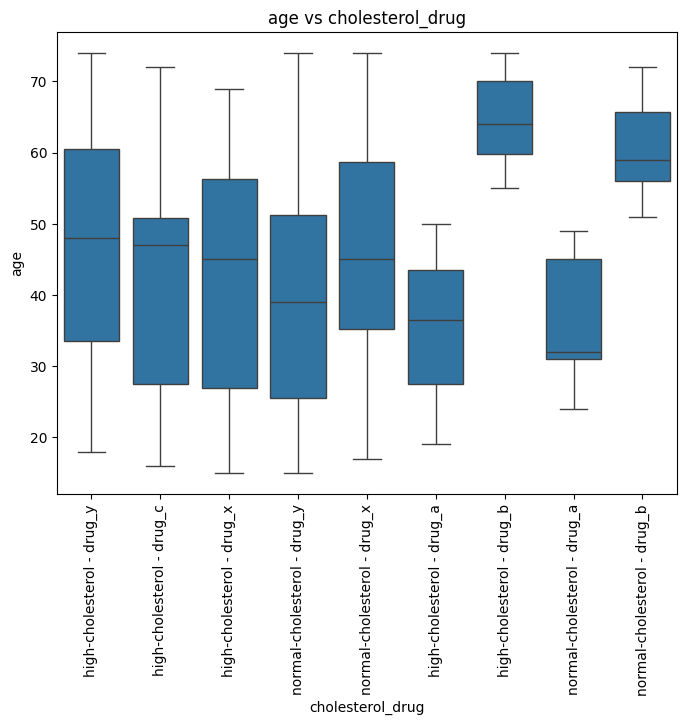

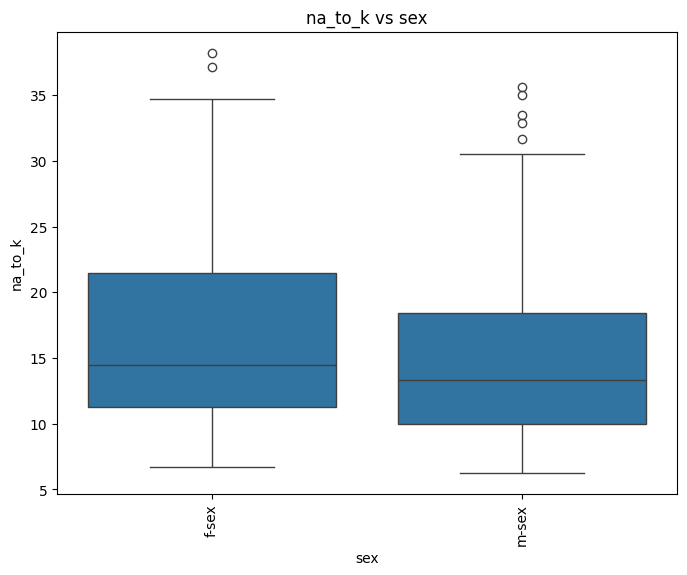

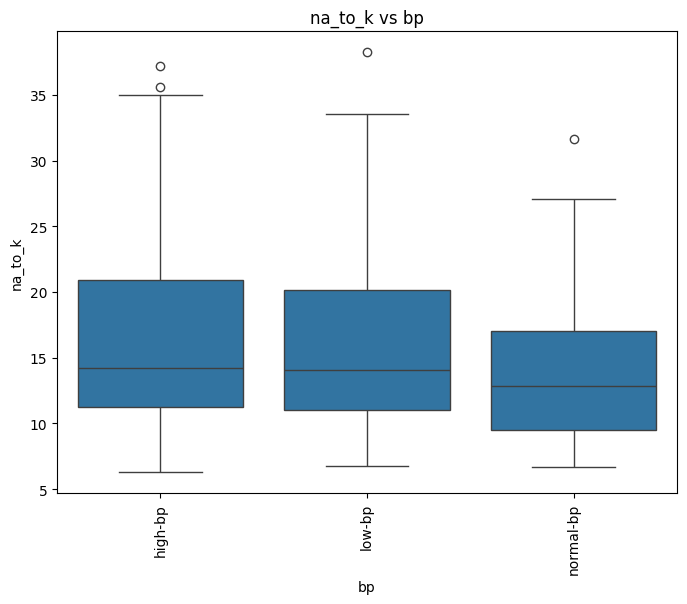

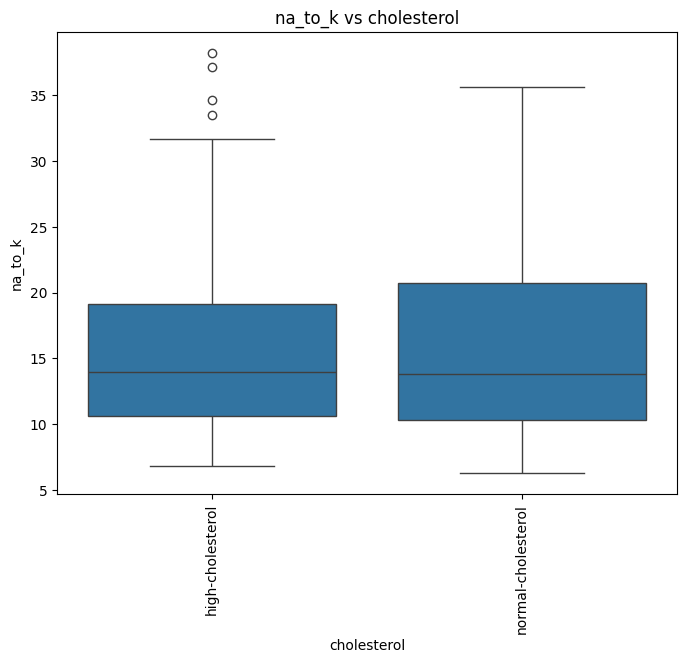

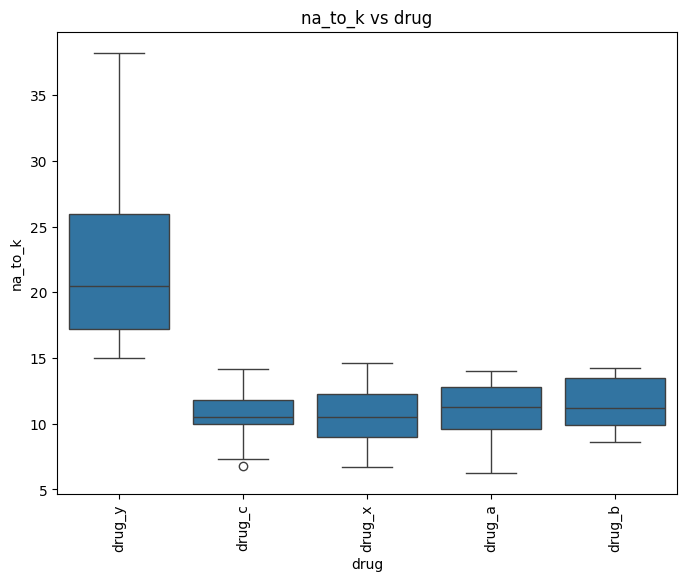

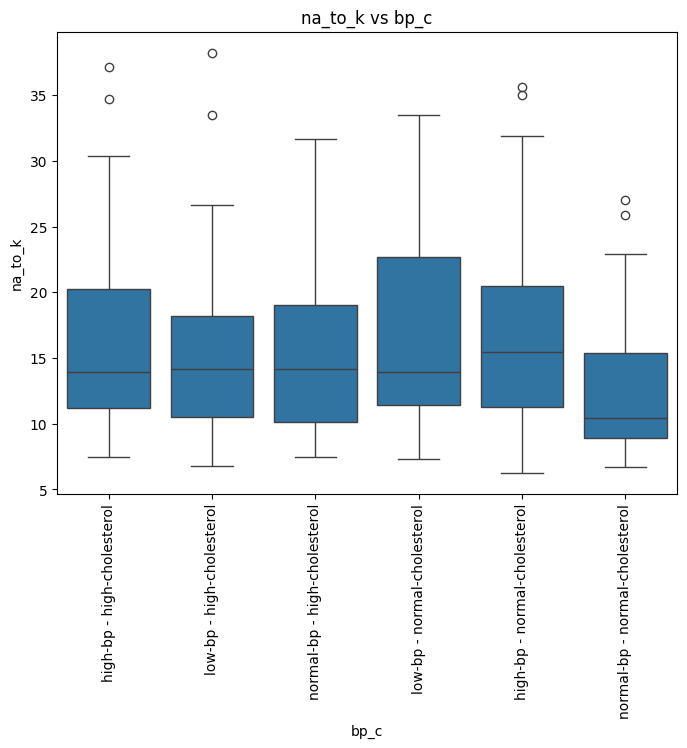

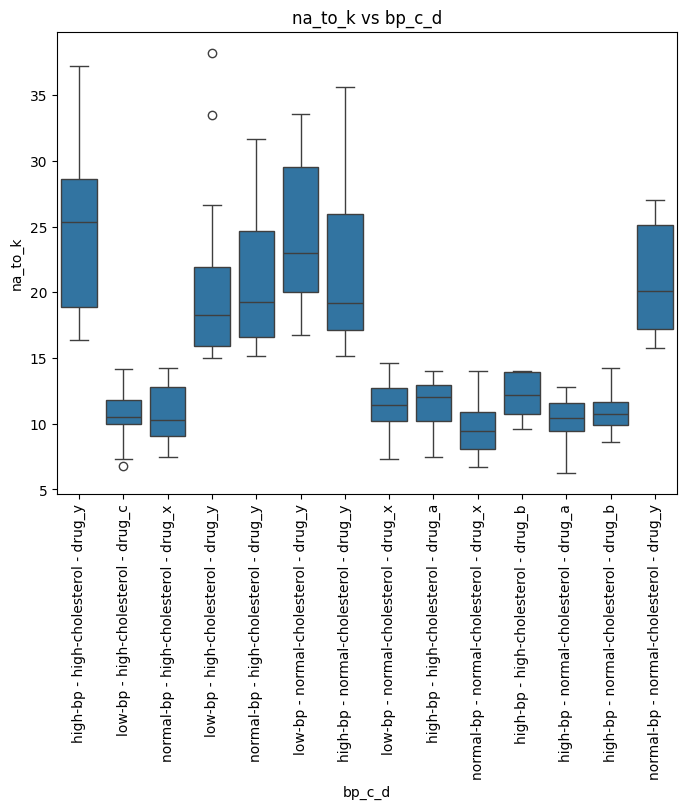

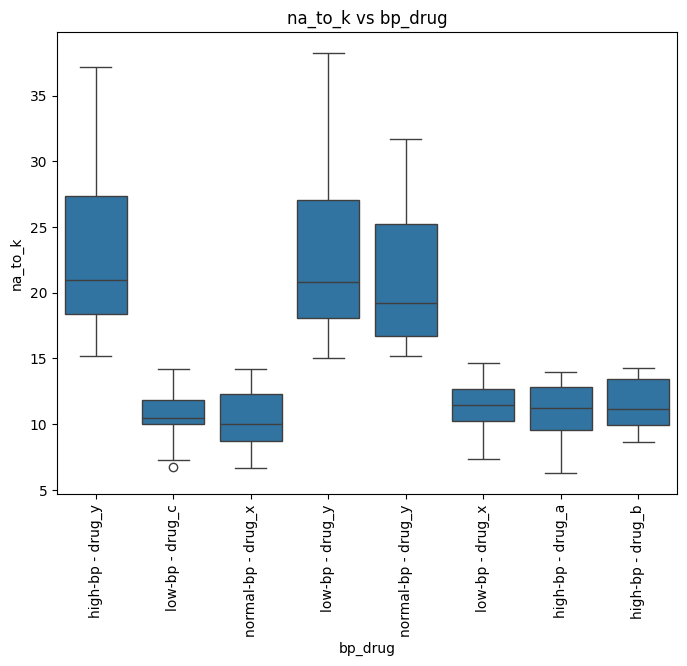

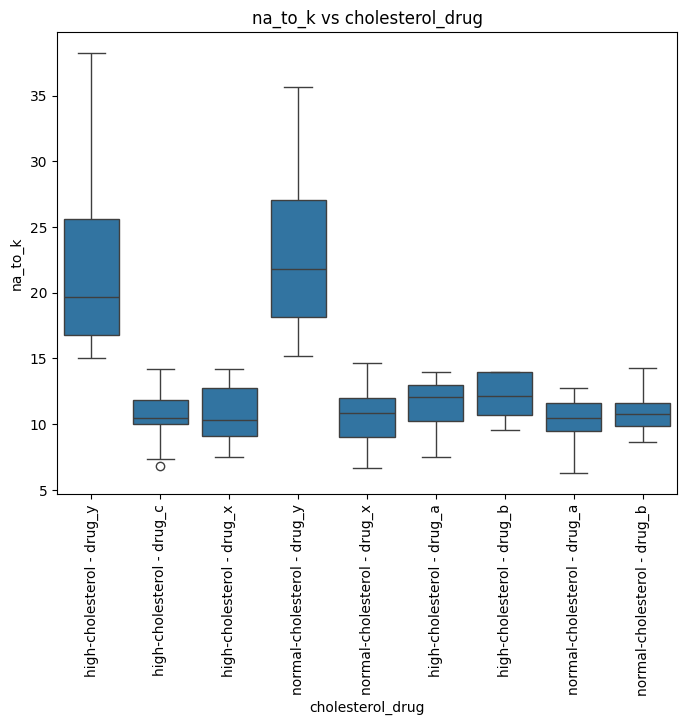

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_tmp.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = df_tmp.select_dtypes(include=["object"]).columns

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df_tmp)
        
        plt.title(f'{num_col} vs {cat_col}')
        plt.xticks(rotation=90)
        plt.show()


#### **FINDING:** *I did not come across any further interesting correlations.*

### 2.1 Feature importance - Mutual information score

In [136]:
df

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,drug_y
1,47,m,low,high,13.093,drug_c
2,47,m,low,high,10.114,drug_c
3,28,f,normal,high,7.798,drug_x
4,61,f,low,high,18.043,drug_y
...,...,...,...,...,...,...
195,56,f,low,high,11.567,drug_c
196,16,m,low,high,12.006,drug_c
197,52,m,normal,high,9.894,drug_x
198,23,m,normal,normal,14.020,drug_x


#### **TAKEAWAY:** *In a multiclass classification model, to calculate the mutual information score, both categorical variables and the target variable need to be encoded into numbers as follows:*
- `['sex']`: `OneHotEncoder` <- I use this because it's not the target variable and there is no order between the variables.
- `['bp', 'cholesterol']`: `OrdinalEncoder` <- There is order among the variables, so I use this.
- `['drug']`: `LabelEncoder` <- This is the target variable, and it needs to be encoded as numerical labels.

In [137]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [138]:
X = df.drop(columns='drug')
y = df['drug']

In [139]:
X.head()

,age,sex,bp,cholesterol,na_to_k
0,23,f,high,high,25.355
1,47,m,low,high,13.093
2,47,m,low,high,10.114
3,28,f,normal,high,7.798
4,61,f,low,high,18.043


In [140]:
ohe = OneHotEncoder(drop='first', sparse_output=False) # drop='first' to avoid 'dummy variable trap' 

X_ohe = ohe.fit_transform(X[['sex']])
ohe_columns = ohe.get_feature_names_out(['sex'])
X_one_hot_df = pd.DataFrame(X_ohe, columns=ohe_columns)
X_one_hot_df.head()

,sex_m
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


#### **TAKEAWAY:** *`drop='first'` is used to remove the first category when creating dummy variables to avoid multicollinearity (the dummy variable trap) in regression models. (I learned this from chatGPT)*

In [141]:
bp_order = ['low', 'normal', 'high']
cholesterol_order = ['normal', 'high']

oe = OrdinalEncoder(categories=[bp_order, cholesterol_order])

X_oe = oe.fit_transform(X[['bp', 'cholesterol']])
X_oe_df = pd.DataFrame(X_oe, columns=['bp', 'cholesterol'])
X_oe_df.head()


,bp,cholesterol
0,2.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,1.0
4,0.0,1.0


In [142]:
X_numeric = X[['age', 'na_to_k']]


In [143]:
X_encoded = pd.concat([X_numeric, X_one_hot_df, X_oe_df], axis=1)
X_encoded.head()

,age,na_to_k,sex_m,bp,cholesterol
0,23,25.355,0.0,2.0,1.0
1,47,13.093,1.0,0.0,1.0
2,47,10.114,1.0,0.0,1.0
3,28,7.798,0.0,1.0,1.0
4,61,18.043,0.0,0.0,1.0


In [144]:
le = LabelEncoder()

y_encoded = le.fit_transform(y)

In [145]:
mi_scores = mutual_info_classif(X_encoded, y_encoded, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_encoded.columns)
mi_scores_df = pd.DataFrame(mi_scores_series).reset_index()
mi_scores_df.columns = ['feaure', 'MIS']
mi_scores_df.sort_values(by='MIS', ascending=False)


,feaure,MIS
1,na_to_k,0.706573
3,bp,0.448161
0,age,0.080361
4,cholesterol,0.031397
2,sex_m,0.000000


#### **FINDING:** *The mutual information analysis indicates that gender has no  effect and the na_to_k ratio has the highest effect to the target variable.*

#### **FINDING:** *Although I cannot examine the correlation related to the target variable in a multiclass classification case, I still looked to see if there is a correlation between the two numerical variables. There is no significant linear relationship between age and the sodium-potassium ratio, and an increase in age does not necessarily lead to a decrease in the sodium-potassium ratio.*

In [146]:
correlation_matrix = df[numerical_columns].corr(method='pearson')
print(correlation_matrix)

              age   na_to_k
age      1.000000 -0.063119
na_to_k -0.063119  1.000000


# 3. ML models

## 3.1 Logistic regression

In [147]:
data = X_encoded.drop(columns='sex_m')

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### **CONTEXT:** *First, I checked whether it was necessary to standardise the numerical variables ('age', 'na_to_k'), as logistic regression is sensitive to the scale of numerical variables.*

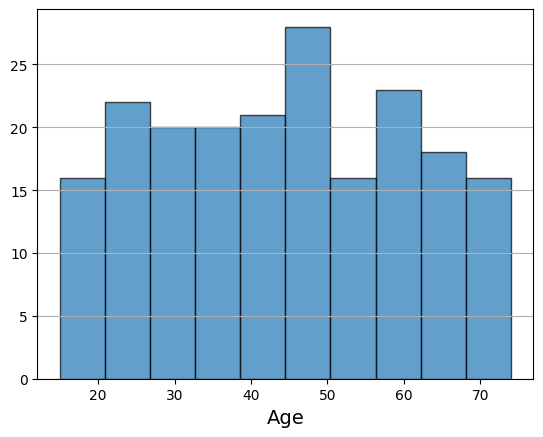

In [149]:
plt.hist(df['age'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Age', fontsize=14)
plt.grid(axis='y')
plt.show()

#### **FINDING:** *Since the 'age' data is normally distributed there is no need for log transformation, the standard scaler or min-max is sufficient.*


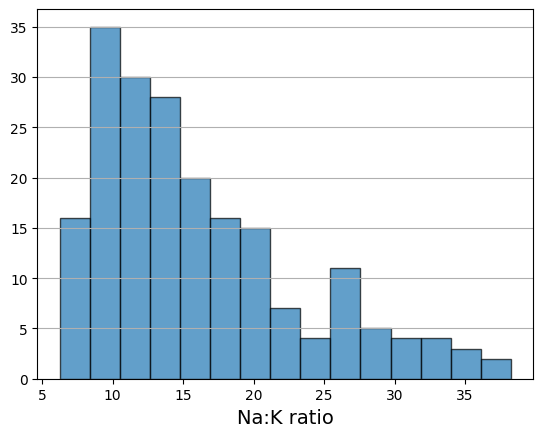

In [150]:
plt.hist(df['na_to_k'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Na:K ratio', fontsize=14)
plt.grid(axis='y')
plt.show()

#### **FINDING:** *The Na:K ratio is not normally distributed, but the values do not vary too widely, so I will use standard scaling here. LOG transformation is not necessary.*

In [151]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_standardized = scaler.fit_transform(X_numeric)
X_num_standardized = pd.DataFrame(X_num_standardized, columns=X_numeric.columns)



In [152]:
X_num_standardized

,age,na_to_k
0,-1.291591,1.286522
1,0.162699,-0.415145
2,0.162699,-0.828558
3,-0.988614,-1.149963
4,1.011034,0.271794
...,...,...
195,0.708057,-0.626917
196,-1.715759,-0.565995
197,0.465676,-0.859089
198,-1.291591,-0.286500


In [153]:
data = data.drop(['age', 'na_to_k'], axis=1)

In [154]:
X = pd.concat([data, X_num_standardized], axis=1)
y = y_encoded

In [155]:
X

,bp,cholesterol,age,na_to_k
0,2.0,1.0,-1.291591,1.286522
1,0.0,1.0,0.162699,-0.415145
2,0.0,1.0,0.162699,-0.828558
3,1.0,1.0,-0.988614,-1.149963
4,0.0,1.0,1.011034,0.271794
...,...,...,...,...
195,0.0,1.0,0.708057,-0.626917
196,0.0,1.0,-1.715759,-0.565995
197,1.0,1.0,0.465676,-0.859089
198,1.0,0.0,-1.291591,-0.286500


In [156]:
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [49]:
lr = LogisticRegression()

In [50]:
y_train

array([1, 4, 4, 3, 1, 4, 3, 3, 4, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 3, 3,
       0, 4, 0, 3, 3, 3, 4, 0, 1, 2, 4, 2, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4,
       0, 4, 2, 3, 0, 3, 4, 0, 1, 1, 3, 3, 2, 3, 3, 4, 4, 4, 4, 3, 2, 1,
       1, 0, 4, 3, 4, 2, 4, 4, 2, 3, 4, 4, 0, 4, 4, 4, 0, 3, 4, 4, 4, 3,
       4, 2, 3, 0, 3, 0, 4, 4, 4, 4, 3, 4, 1, 3, 3, 4, 1, 4, 1, 4, 4, 1,
       4, 4, 0, 3, 4, 3, 0, 4, 2, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 4, 4, 0,
       3, 2, 2, 4, 3, 4, 4, 4, 1, 4, 0, 3, 3, 0, 4, 4, 4, 4, 4, 3, 0, 4,
       3, 4, 0, 3, 0, 3])

In [51]:
X_train

,bp,cholesterol,age,na_to_k
108,2.0,0.0,1.677584,-0.889203
107,0.0,1.0,-0.140278,0.545182
189,2.0,0.0,1.192821,0.672717
14,1.0,1.0,0.344485,-0.469268
56,2.0,0.0,1.253416,-0.658419
...,...,...,...,...
133,1.0,1.0,-1.230996,1.346334
137,2.0,1.0,-0.564446,-0.442762
72,1.0,1.0,-1.230996,-0.760419
140,2.0,0.0,0.283889,-1.362151


In [52]:
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict_proba(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

In [55]:
y_pred

array([[2.05137044e-02, 1.28435601e-01, 1.32917112e-02, 7.77802852e-01,
        5.99561315e-02],
       [4.94319866e-04, 2.30509848e-02, 2.66754060e-03, 1.13051164e-02,
        9.62482038e-01],
       [2.81693185e-02, 5.17183474e-02, 7.27266085e-02, 3.20299483e-01,
        5.27086243e-01],
       [1.96807092e-03, 1.99783917e-04, 5.71347730e-01, 3.45098391e-01,
        8.13860241e-02],
       [2.25956507e-07, 3.92086341e-08, 2.94806884e-09, 1.12396748e-08,
        9.99999721e-01],
       [5.39580330e-02, 4.17652162e-03, 1.61043013e-02, 4.53206949e-01,
        4.72554195e-01],
       [1.41443747e-03, 7.38051089e-04, 1.17225902e-01, 8.28235917e-01,
        5.23856931e-02],
       [1.17895414e-04, 1.64345419e-03, 9.90798500e-02, 6.92531796e-02,
        8.29905621e-01],
       [2.52913401e-04, 4.26028060e-04, 1.40461324e-01, 7.96807343e-02,
        7.79179000e-01],
       [2.93923650e-06, 4.37947211e-05, 5.96472258e-04, 2.56584063e-03,
        9.96790953e-01],
       [1.02880301e-03, 1.4809

In [56]:
auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print(f'AUC: {auc}')

AUC: 0.992210600330805


In [57]:
y_pred_round = np.round(y_pred)

In [58]:
y_test

array([3, 4, 3, 2, 4, 3, 3, 4, 4, 4, 3, 2, 4, 4, 0, 0, 3, 3, 1, 4, 3, 3,
       3, 4, 1, 3, 3, 4, 2, 3, 2, 4, 4, 4, 0, 4, 0, 4, 4, 4])

In [59]:
y_pred_argm = np.argmax(y_pred, axis=1)

In [60]:
encoded_drug_names = le.classes_
encoded_drug_names

array(['drug_a', 'drug_b', 'drug_c', 'drug_x', 'drug_y'], dtype=object)

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names)
print("Classification Report:")
print(report)

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 1  1  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 11  2]
 [ 0  0  1  0 16]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a       0.80      1.00      0.89         4
      drug_b       1.00      0.50      0.67         2
      drug_c       0.67      0.50      0.57         4
      drug_x       0.85      0.85      0.85        13
      drug_y       0.89      0.94      0.91        17

    accuracy                           0.85        40
   macro avg       0.84      0.76      0.78        40
weighted avg       0.85      0.85      0.84        40



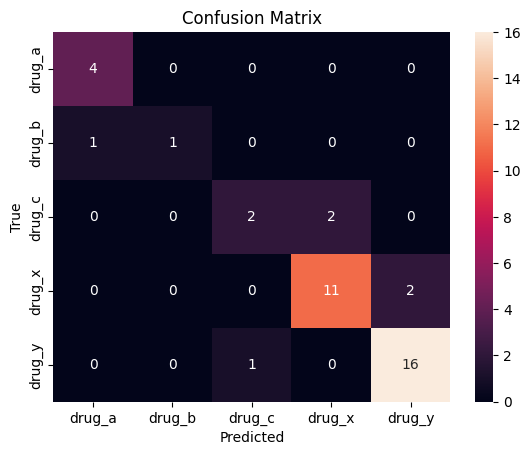

In [62]:
cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### **FINDING:** *The model is not completely bad, but due to the low sample size and the fact that there are target variable classes with very few samples, it may be necessary to upscale the data with SMOTE, but before all that, I will also try a 30% test split.*

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


AUC: 0.9943259116317525

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 16  3]
 [ 0  0  1  0 26]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a       0.67      1.00      0.80         4
      drug_b       1.00      0.67      0.80         6
      drug_c       0.67      0.50      0.57         4
      drug_x       0.89      0.84      0.86        19
      drug_y       0.90      0.96      0.93        27

    accuracy                           0.87        60
   macro avg       0.82      0.79      0.79        60
weighted avg       0.87      0.87      0.86        60



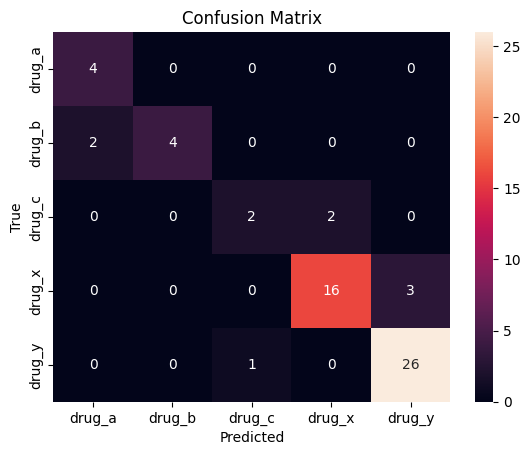

In [64]:
lr.fit(X_train, y_train)

y_pred = lr.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### **FINDING:** *The 30% test split slightly improved the overall accuracy, but there was one target variable group (drug_b) where the f1 score remained at 0.57, so as the drug_a/b/c groups are quite underrepresented I will apply the SMOTE technique to create synthetic data.*

**SMOTE** (Synthetic Minority Over-sampling Technique) is a method used to generate synthetic data for the underrepresented class to train machine learning models more effectively. Here’s a brief explanation of how it works:

1. **Selection**: A sample from the minority class is selected.
2. **Nearest Neighbors**: It finds the k-nearest neighbors of the selected sample (usually based on Euclidean distance).
3. **Interpolation**: A new synthetic data point is created by interpolating between the selected sample and one of its neighbors along the line segment connecting them.
4. **Scale**: The synthetic data points remain on the same scale as the original data since they are generated between real data points.

**Why does this improve model prediction?**
- The synthetic samples are not duplicates but new points that reflect the characteristics of the original data, helping the model generalize better.
- A more balanced dataset reduces the class imbalance problem, improving the model's performance and reliability.

It’s crucial that the synthetic data aligns well with the distribution of the original data to avoid the model learning unrealistic patterns.

A short article about SMOTE: https://medium.com/@ziad.seng/smote-synthetic-minority-over-sampling-technique-3eb26ddd7aec


##### **CONTEXT:** *First, I will concatenate the X feature dataframe containing the already standardised data with the y encoded array, then I will split it into train and test sets, and afterwards I will create synthetic data using SMOTE.*

In [65]:
y = pd.Series(y)
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Length: 200, dtype: int64

In [66]:
df_concat = pd.concat([X, y], axis=1)

In [67]:
df_concat.rename(columns={0: 'drug'}, inplace=True)
df_concat

,bp,cholesterol,age,na_to_k,drug
0,2.0,1.0,-1.291591,1.286522,4
1,0.0,1.0,0.162699,-0.415145,2
2,0.0,1.0,0.162699,-0.828558,2
3,1.0,1.0,-0.988614,-1.149963,3
4,0.0,1.0,1.011034,0.271794,4
...,...,...,...,...,...
195,0.0,1.0,0.708057,-0.626917,2
196,0.0,1.0,-1.715759,-0.565995,2
197,1.0,1.0,0.465676,-0.859089,3
198,1.0,0.0,-1.291591,-0.286500,3


In [68]:
df_train_SMOTE, df_test = train_test_split(df_concat, test_size= 0.3, random_state=1)

In [69]:
df_train_SMOTE

,bp,cholesterol,age,na_to_k,drug
116,1.0,0.0,1.374607,-0.911824,3
67,1.0,0.0,-1.655163,-0.728917,3
78,2.0,1.0,-1.533973,-0.384615,0
42,1.0,0.0,0.344485,-0.040867,4
17,2.0,1.0,-0.079683,-0.293162,0
...,...,...,...,...,...
133,1.0,1.0,-1.230996,1.346334,4
137,2.0,1.0,-0.564446,-0.442762,0
72,1.0,1.0,-1.230996,-0.760419,3
140,2.0,0.0,0.283889,-1.362151,0


In [70]:
X_train_SMOTE = df_train_SMOTE.drop(columns='drug')
X_test = df_test.drop(columns='drug')

y_train_SMOTE = df_train_SMOTE['drug']
y_test = df_test['drug']

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE(random_state=1)

In [73]:
X_train_resamp, y_train_resamp = smote.fit_resample(X_train_SMOTE, y_train_SMOTE)

In [74]:
X_train_resamp

,bp,cholesterol,age,na_to_k
0,1.0,0.000000,1.374607,-0.911824
1,1.0,0.000000,-1.655163,-0.728917
2,2.0,1.000000,-1.533973,-0.384615
3,1.0,0.000000,0.344485,-0.040867
4,2.0,1.000000,-0.079683,-0.293162
...,...,...,...,...
315,1.0,0.287775,-1.550536,-0.671888
316,1.0,1.000000,0.505071,-0.781099
317,1.0,1.000000,0.464502,-0.849136
318,0.0,0.000000,-0.443255,-0.701398


In [75]:
y_train_resamp.value_counts()

drug
3    64
0    64
4    64
1    64
2    64
Name: count, dtype: int64


AUC: 0.9984287317620651

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 17  2]
 [ 0  0  1  0 26]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a      1.000     1.000     1.000         4
      drug_b      1.000     1.000     1.000         6
      drug_c      0.800     1.000     0.889         4
      drug_x      1.000     0.895     0.944        19
      drug_y      0.929     0.963     0.945        27

    accuracy                          0.950        60
   macro avg      0.946     0.972     0.956        60
weighted avg      0.955     0.950     0.950        60



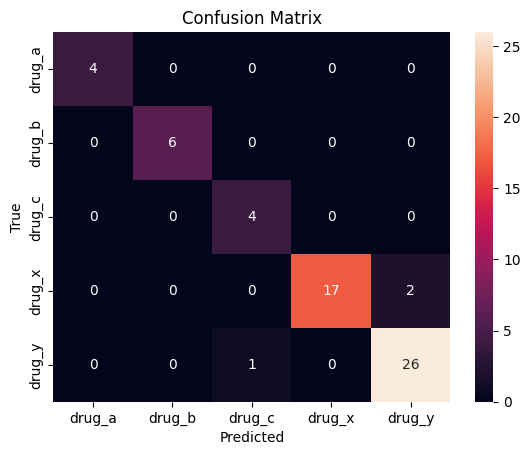

In [76]:
lr.fit(X_train_resamp, y_train_resamp)

y_pred = lr.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names, digits=3)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### **FINDING:** *It seems that SMOTE worked well, and it was possible to achieve an f1 score of 89% for one of the underrepresented groups!*

## 3.2 Decision tree

#### **CONTEXT** *Since the SMOTE training dataset worked well, I will use this for the remainder of the project.*

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt = DecisionTreeClassifier(
    random_state=1
    )

In [79]:
dt.fit(X_train_resamp, y_train_resamp)

DecisionTreeClassifier(random_state=1)

In [80]:
y_pred = dt.predict_proba(X_test)


AUC: 0.981547619047619

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 1  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a      0.800     1.000     0.889         4
      drug_b      1.000     0.833     0.909         6
      drug_c      1.000     1.000     1.000         4
      drug_x      1.000     1.000     1.000        19
      drug_y      1.000     1.000     1.000        27

    accuracy                          0.983        60
   macro avg      0.960     0.967     0.960        60
weighted avg      0.987     0.983     0.984        60



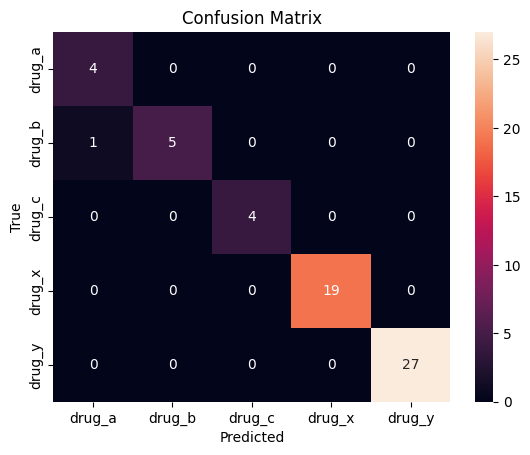

In [81]:
auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names, digits=3)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Decision tree parameter tuning

In [82]:
scores = []

for d in [1,2,3,4, 5, 6, 7, 8, 9, 10]:
    dt = DecisionTreeClassifier(
        max_depth=d,
        random_state=1
    )
    dt.fit(X_train_resamp, y_train_resamp)
    
    y_pred_proba = dt.predict_proba(X_test)
    y_pred = dt.predict(X_test)

    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"max_depth = {d:<3} => AUC: {auc:<20} | Accuracy: {accuracy}")
    scores.append([d, auc, accuracy])

max_depth = 1   => AUC: 0.8122822299651566   | Accuracy: 0.5166666666666667
max_depth = 2   => AUC: 0.9381936378887599   | Accuracy: 0.5833333333333334
max_depth = 3   => AUC: 0.970051653524054    | Accuracy: 0.9
max_depth = 4   => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 5   => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 6   => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 7   => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 8   => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 9   => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333


In [83]:
scores = pd.DataFrame(scores, columns=['max_depth', 'auc', 'accuracy'])
scores

,max_depth,auc,accuracy
0,1,0.812282,0.516667
1,2,0.938194,0.583333
2,3,0.970052,0.900000
3,4,0.981548,0.983333
4,5,0.981548,0.983333
5,6,0.981548,0.983333
6,7,0.981548,0.983333
7,8,0.981548,0.983333
8,9,0.981548,0.983333
9,10,0.981548,0.983333


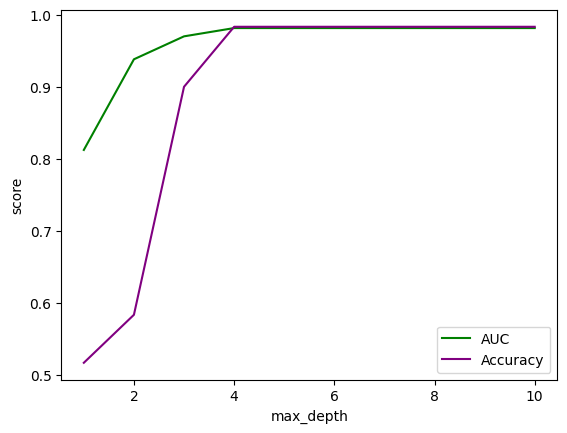

In [84]:
plt.plot(scores['max_depth'], scores['auc'], label='AUC', color='green')
plt.plot(scores['max_depth'], scores['accuracy'], label='Accuracy', color='purple')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()

#### **FINDING:** *The AUC value does not increase after `max_depth = 4`, probably because we are dealing with a small dataset.*

In [85]:
for s in [1,2,3,4,5,6,7,8,9,10]:
    dt = DecisionTreeClassifier(
        max_depth=4,
        min_samples_leaf=s,
        random_state=42        
    )
    dt.fit(X_train_resamp, y_train_resamp)
    
    y_pred_proba = dt.predict_proba(X_test)
    y_pred = dt.predict(X_test)

    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"max_depth = {d:<3} => AUC: {auc:<20} | Accuracy: {accuracy}")

max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333


#### **FINDING:** *The min_samples_leaf has no effect on the AUC.*

In [86]:
for split in [2,3,4,5,6,7,8,9,10]:
    dt = DecisionTreeClassifier(
        max_depth=4,
        min_samples_split=split,
        random_state=42        
    )
    dt.fit(X_train_resamp, y_train_resamp)
    
    y_pred_proba = dt.predict_proba(X_test)
    y_pred = dt.predict(X_test)

    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"max_depth = {d:<3} => AUC: {auc:<20} | Accuracy: {accuracy}")

max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333
max_depth = 10  => AUC: 0.981547619047619    | Accuracy: 0.9833333333333333


#### **FINDING:** *The min_samples_split has no effect on the AUC. Due to the small data set, changing the parameters did not improve the performance of the model.*


AUC: 0.981547619047619

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 1  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a      0.800     1.000     0.889         4
      drug_b      1.000     0.833     0.909         6
      drug_c      1.000     1.000     1.000         4
      drug_x      1.000     1.000     1.000        19
      drug_y      1.000     1.000     1.000        27

    accuracy                          0.983        60
   macro avg      0.960     0.967     0.960        60
weighted avg      0.987     0.983     0.984        60



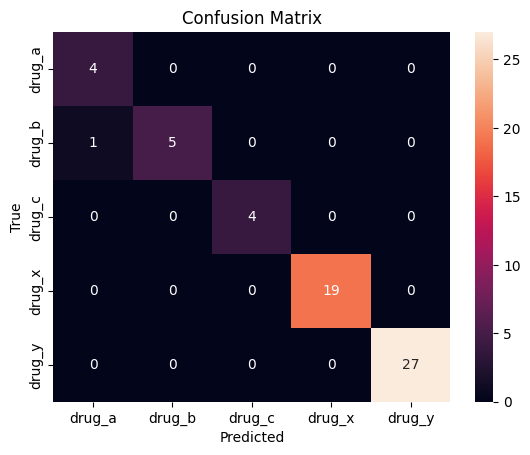

In [87]:
dt = DecisionTreeClassifier(
    random_state=1,
    max_depth=4
    )

dt.fit(X_train_resamp, y_train_resamp)
y_pred = dt.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names, digits=3)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## 3.3 Random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(
    random_state=1
)

In [90]:
rf.fit(X_train_resamp, y_train_resamp)

RandomForestClassifier(random_state=1)

In [91]:
y_pred = rf.predict_proba(X_test)


AUC: 0.9969466490299823

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a      0.667     1.000     0.800         4
      drug_b      1.000     0.667     0.800         6
      drug_c      1.000     1.000     1.000         4
      drug_x      1.000     1.000     1.000        19
      drug_y      1.000     1.000     1.000        27

    accuracy                          0.967        60
   macro avg      0.933     0.933     0.920        60
weighted avg      0.978     0.967     0.967        60



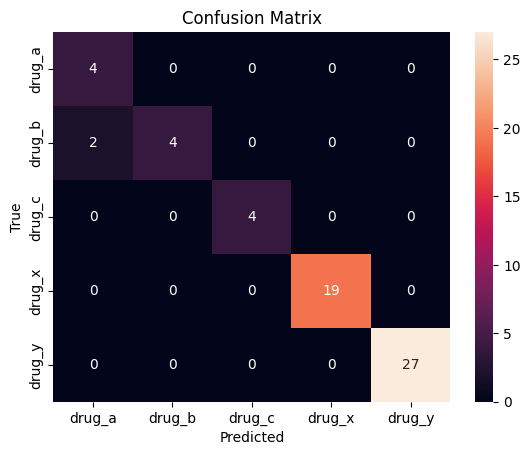

In [92]:
auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names, digits=3)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [93]:
scores = []

for estimators in range(2, 20):
    
    rf = RandomForestClassifier(
        n_estimators=estimators,
        max_depth=d,
        random_state=1        
    )
    rf.fit(X_train_resamp, y_train_resamp)

    y_pred_proba = rf.predict_proba(X_test)
    y_pred = rf.predict(X_test)

    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"n_estimators = {estimators:<3} => AUC: {auc:<20} | Accuracy: {accuracy}")

    scores.append([estimators, auc, accuracy])

n_estimators = 2   => AUC: 0.9833333333333334   | Accuracy: 0.9833333333333333
n_estimators = 3   => AUC: 0.9833333333333334   | Accuracy: 0.9833333333333333
n_estimators = 4   => AUC: 0.9833333333333334   | Accuracy: 0.9833333333333333
n_estimators = 5   => AUC: 0.9833333333333334   | Accuracy: 0.9666666666666667
n_estimators = 6   => AUC: 0.9830246913580247   | Accuracy: 0.9666666666666667
n_estimators = 7   => AUC: 0.9830246913580247   | Accuracy: 0.9666666666666667
n_estimators = 8   => AUC: 0.9830246913580247   | Accuracy: 0.9666666666666667
n_estimators = 9   => AUC: 0.9830246913580247   | Accuracy: 0.9833333333333333
n_estimators = 10  => AUC: 0.9830246913580247   | Accuracy: 0.9833333333333333
n_estimators = 11  => AUC: 0.9822696208112875   | Accuracy: 0.9833333333333333
n_estimators = 12  => AUC: 0.999074074074074    | Accuracy: 0.9833333333333333
n_estimators = 13  => AUC: 0.9987654320987656   | Accuracy: 0.9833333333333333
n_estimators = 14  => AUC: 0.9987654320987656   | Ac

In [94]:
scores = pd.DataFrame(scores, columns=['n_estimators', 'auc', 'accuracy'])
scores

,n_estimators,auc,accuracy
0,2,0.983333,0.983333
1,3,0.983333,0.983333
2,4,0.983333,0.983333
3,5,0.983333,0.966667
4,6,0.983025,0.966667
5,7,0.983025,0.966667
6,8,0.983025,0.966667
7,9,0.983025,0.983333
8,10,0.983025,0.983333
9,11,0.982270,0.983333


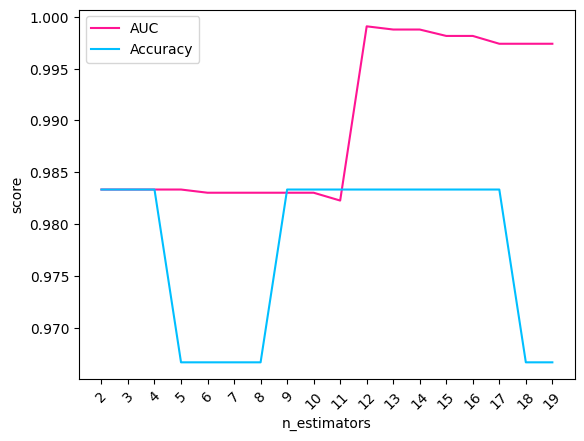

In [95]:
plt.plot(scores['n_estimators'], scores['auc'], label='AUC', color='deeppink')
plt.plot(scores['n_estimators'], scores['accuracy'], label='Accuracy', color='deepskyblue')
plt.xticks(scores['n_estimators'], rotation=45)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()
plt.show()

#### **FINDING:** *The best `AUC` and `accuracy` result was achieved with `n_estimators = 12`, so I will use this in my model (the default `n_estimators` is 100 in scikit-learn, it is possible that the accuracy is better with fewer estimators because overfitting occurs at 100 due to the small size of the dataset, which consists of only 200 rows)*

In [96]:
scores = []

for d in range(2, 10):
    
    rf = RandomForestClassifier(
        n_estimators=12,
        max_depth=d,
        random_state=1        
    )
    rf.fit(X_train_resamp, y_train_resamp)

    y_pred_proba = rf.predict_proba(X_test)
    y_pred = rf.predict(X_test)

    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"max_depth = {d:<3} => AUC: {auc:<20} | Accuracy: {accuracy}")

    scores.append([d, auc, accuracy])
    

max_depth = 2   => AUC: 0.994235008818342    | Accuracy: 0.9666666666666667
max_depth = 3   => AUC: 0.9927634479717813   | Accuracy: 0.9666666666666667
max_depth = 4   => AUC: 0.9817901234567902   | Accuracy: 0.9666666666666667
max_depth = 5   => AUC: 0.9962962962962962   | Accuracy: 0.9666666666666667
max_depth = 6   => AUC: 0.9996913580246914   | Accuracy: 0.9666666666666667
max_depth = 7   => AUC: 0.9993827160493828   | Accuracy: 0.9833333333333333
max_depth = 8   => AUC: 0.9993827160493828   | Accuracy: 0.9833333333333333
max_depth = 9   => AUC: 0.999074074074074    | Accuracy: 0.9833333333333333


In [97]:
scores = pd.DataFrame(scores, columns=['max_depth', 'auc', 'accuracy'])
scores

,max_depth,auc,accuracy
0,2,0.994235,0.966667
1,3,0.992763,0.966667
2,4,0.981790,0.966667
3,5,0.996296,0.966667
4,6,0.999691,0.966667
5,7,0.999383,0.983333
6,8,0.999383,0.983333
7,9,0.999074,0.983333


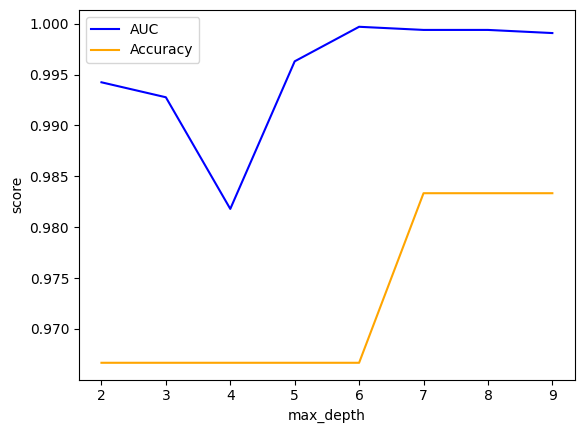

In [98]:
plt.plot(scores['max_depth'], scores['auc'], label='AUC', color='blue')
plt.plot(scores['max_depth'], scores['accuracy'], label='Accuracy', color='orange')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend()
plt.show()

#### **FINDING:** *I choose max_depth = 7 because the `AUC` values show small differences (ranging from 0.9942 to 0.9997), which do not significantly improve the classification quality. In contrast, the `accuracy` shows a substantial increase at a depth of 7, indicating a more significant improvement.*


AUC: 0.9993827160493828

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 1  5  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a      0.800     1.000     0.889         4
      drug_b      1.000     0.833     0.909         6
      drug_c      1.000     1.000     1.000         4
      drug_x      1.000     1.000     1.000        19
      drug_y      1.000     1.000     1.000        27

    accuracy                          0.983        60
   macro avg      0.960     0.967     0.960        60
weighted avg      0.987     0.983     0.984        60



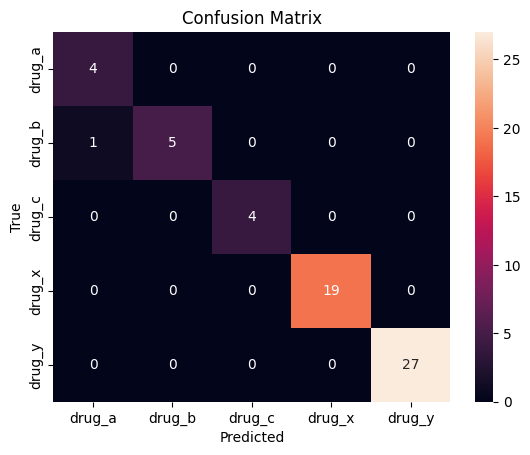

In [99]:
rf = RandomForestClassifier(
    random_state=1,
    n_estimators=12,
    max_depth=7 
)

rf.fit(X_train_resamp, y_train_resamp)

y_pred = rf.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names, digits=3)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## XGBoost

In [100]:
import xgboost as xgb

In [101]:
model = xgb.XGBClassifier(
    random_state=1
)

In [102]:
model.fit(X_train_resamp, y_train_resamp)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [103]:
y_pred = model.predict_proba(X_test)


AUC: 0.9975408850408851

Confusion Matrix:
[[ 3  0  0  1  0]
 [ 0  3  0  3  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  1  0 26]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a      1.000     0.750     0.857         4
      drug_b      1.000     0.500     0.667         6
      drug_c      0.800     1.000     0.889         4
      drug_x      0.826     1.000     0.905        19
      drug_y      1.000     0.963     0.981        27

    accuracy                          0.917        60
   macro avg      0.925     0.843     0.860        60
weighted avg      0.932     0.917     0.911        60



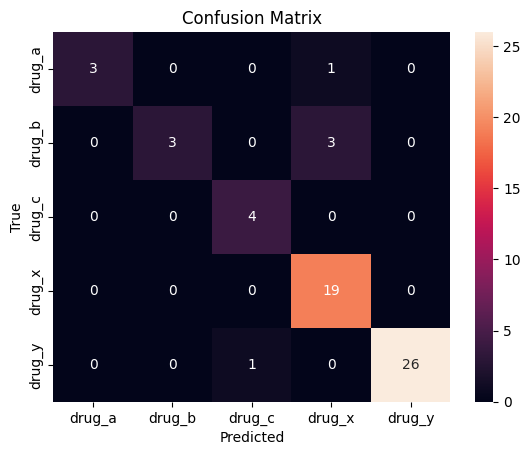

In [104]:
auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names, digits=3)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### XGBoost parameter tuning

In [105]:
scores = []


for n_est in [1, 2, 5, 10, 15, 25, 50, 100]:
    for max_d in [1, 2, 3, 4, 5, 10, 15, 25]:
        for l_rate in [0.001, 0.01, 0.1, 1]:
            model = xgb.XGBClassifier(
                n_estimators=n_est,
                max_depth=max_d,
                learning_rate=l_rate,
                random_state=1
            )
            model.fit(X_train_resamp, y_train_resamp)
            
            y_pred_proba = model.predict_proba(X_test)
            y_pred = model.predict(X_test)

            auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
            accuracy = accuracy_score(y_test, y_pred)
            
            
            print(f'n_estimators = {n_est:<3}, max_depth = {max_d:<3}, learning_rate = {l_rate:<6} has AUC: {auc:<20} and accuracy: {accuracy}')
            scores.append([n_est, max_d, l_rate, auc, accuracy])

n_estimators = 1  , max_depth = 1  , learning_rate = 0.001  has AUC: 0.9157778886116498   and accuracy: 0.7666666666666667
n_estimators = 1  , max_depth = 1  , learning_rate = 0.01   has AUC: 0.9157778886116498   and accuracy: 0.7666666666666667
n_estimators = 1  , max_depth = 1  , learning_rate = 0.1    has AUC: 0.9157778886116498   and accuracy: 0.7666666666666667
n_estimators = 1  , max_depth = 1  , learning_rate = 1      has AUC: 0.9170615856591466   and accuracy: 0.7666666666666667
n_estimators = 1  , max_depth = 2  , learning_rate = 0.001  has AUC: 0.9653542211188231   and accuracy: 0.9333333333333333
n_estimators = 1  , max_depth = 2  , learning_rate = 0.01   has AUC: 0.9653542211188231   and accuracy: 0.9333333333333333
n_estimators = 1  , max_depth = 2  , learning_rate = 0.1    has AUC: 0.9653542211188231   and accuracy: 0.9333333333333333
n_estimators = 1  , max_depth = 2  , learning_rate = 1      has AUC: 0.9762971981721982   and accuracy: 0.9333333333333333
n_estimators = 1

In [106]:
scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'learning_rate', 'auc', 'accuracy'])
scores

,n_estimators,max_depth,learning_rate,auc,accuracy
0,1,1,0.001,0.915778,0.766667
1,1,1,0.010,0.915778,0.766667
2,1,1,0.100,0.915778,0.766667
3,1,1,1.000,0.917062,0.766667
4,1,2,0.001,0.965354,0.933333
...,...,...,...,...,...
251,100,15,1.000,0.997816,0.916667
252,100,25,0.001,0.996837,0.933333
253,100,25,0.010,0.996837,0.933333
254,100,25,0.100,0.996424,0.916667


In [107]:
scores.sort_values(by=['accuracy', 'n_estimators'], ascending=[False, True])


,n_estimators,max_depth,learning_rate,auc,accuracy
167,25,2,1.000,0.997985,0.966667
199,50,2,1.000,0.997985,0.966667
231,100,2,1.000,0.997368,0.966667
103,10,2,1.000,0.998209,0.950000
135,15,2,1.000,0.998209,0.950000
...,...,...,...,...,...
161,25,1,0.010,0.915778,0.766667
192,50,1,0.001,0.915778,0.766667
193,50,1,0.010,0.947395,0.766667
224,100,1,0.001,0.915778,0.766667



AUC: 0.9157778886116498

Confusion Matrix:
[[ 4  0  0  0  0]
 [ 3  3  0  0  0]
 [ 0  2  2  0  0]
 [ 0  4  4 11  0]
 [ 0  0  1  0 26]]

------------------------

Classification Report:
              precision    recall  f1-score   support

      drug_a      0.571     1.000     0.727         4
      drug_b      0.333     0.500     0.400         6
      drug_c      0.286     0.500     0.364         4
      drug_x      1.000     0.579     0.733        19
      drug_y      1.000     0.963     0.981        27

    accuracy                          0.767        60
   macro avg      0.638     0.708     0.641        60
weighted avg      0.857     0.767     0.786        60



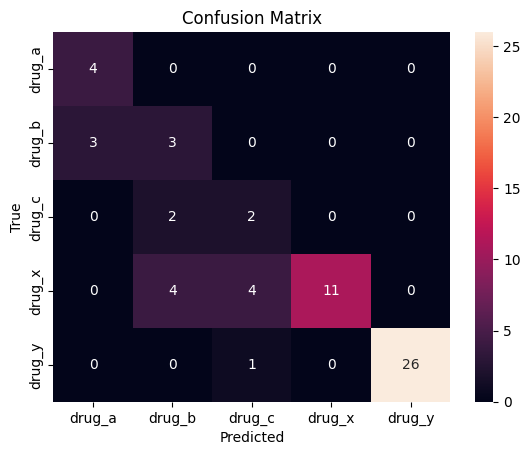

In [108]:
model = xgb.XGBClassifier(
    random_state=1,
    max_depth=1,
    n_estimators=1,
    learning_rate=0.001
)
model.fit(X_train_resamp, y_train_resamp)
y_pred = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
print()
print(f'AUC: {auc}')
print()

y_pred_argm = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_argm)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('------------------------')
print()

report = classification_report(y_test, y_pred_argm, target_names=encoded_drug_names, digits=3)
print("Classification Report:")
print(report)


cm = confusion_matrix(y_test, y_pred_argm)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoded_drug_names, yticklabels=encoded_drug_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### **FINDING:** *With XGBoost, I was unable to achieve better results than with random forest using basic parameter tuning. I will not be working with this model now.*

#### **FINDING:** *I choose the Decision tree model among the models because it is a simpler model and it performed quite well.*

# Cross validation
#### **CONTEXT:** *I am performing cross-validation on the Decision tree model to examine how well the model performs across the entire dataset.*

In [109]:
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import numpy as np


X = df_concat.drop(columns='drug').values 
y = df_concat['drug'].values 

dt = DecisionTreeClassifier(
    random_state=1,
    max_depth=4 
)
# kf = KFold(n_splits=5, shuffle=True, random_state=42) 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1

scores = []

for train_index, test_index in skf.split(X, y):

    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 

    smote = SMOTE(random_state=1)
    X_train_resamp, y_train_resamp = smote.fit_resample(X_train, y_train)



    dt.fit(X_train_resamp, y_train_resamp)

    y_pred_proba = dt.predict_proba(X_test)
    y_pred = dt.predict(X_test)

    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Fold {fold} AUC: {auc:.4f}, accuracy: {accuracy:.4f}")

    scores.append([auc, accuracy])

    fold += 1
    
scores = np.array(scores)

mean_auc = np.mean(scores[:, 0])
mean_accuracy = np.mean(scores[:, 1])
print()
print(f'Mean AUC across all folds:, {mean_auc:.4f}')
print(f'Mean accuracy across all folds:, {mean_accuracy:.4f}')


Fold 1 AUC: 1.0000, accuracy: 1.0000
Fold 2 AUC: 1.0000, accuracy: 1.0000
Fold 3 AUC: 1.0000, accuracy: 1.0000
Fold 4 AUC: 0.9864, accuracy: 0.9750
Fold 5 AUC: 0.9722, accuracy: 0.9750

Mean AUC across all folds:, 0.9917
Mean accuracy across all folds:, 0.9900


#### **FINDING:** *Based on cross-validation, the model performs well across the entire dataset.*